# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator #we want to import the image data generator. Und das ist halt sehr wichtig für das preprocessing der Bilder (will er genauer in Part 1 erklären (s.u.))

In [2]:
tf.__version__

'2.13.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator( #ein Objekt train_datagen von der Klasse ImageDataGenerator. Hiermir mache wir alle Transoformationen auf unsere Trainingsbilder (hier sind 4 Transformationen)
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory( #training_set ist das Trainingsset. Hier verbinden wir dann das omage augmentation tool (train_datagen) mit unserem Trainingsset aus dem Ordner
        'dataset/training_set', #das ist eine einfache Pfad/Path angabe, ausgehen von dem Root-Folder (Convolutional_Neural_Networks 3)
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8048 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

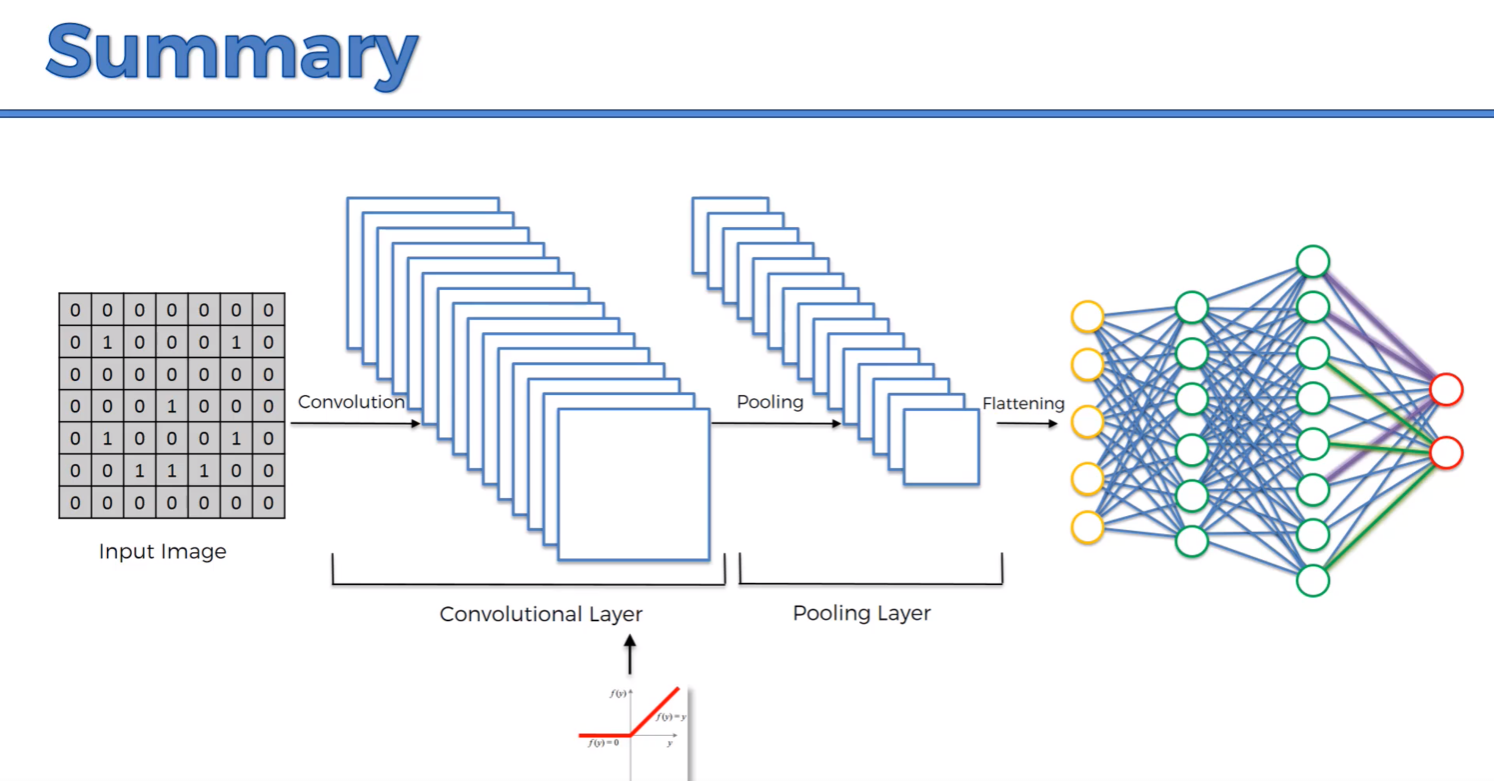

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=34, kernel_size=3, activation='relu', input_shape=[64,64,3]))
#unten sieht man das Bild. Rechts sieht man im Prinzip den Filter. Die Filterparameter werden sagen wie viele Feature Detectoren we wollen / wie viele Filter wir wollen. Die Kernal size ist die Länge/breite bzw. Spalte/Zeile des Feature Detectors

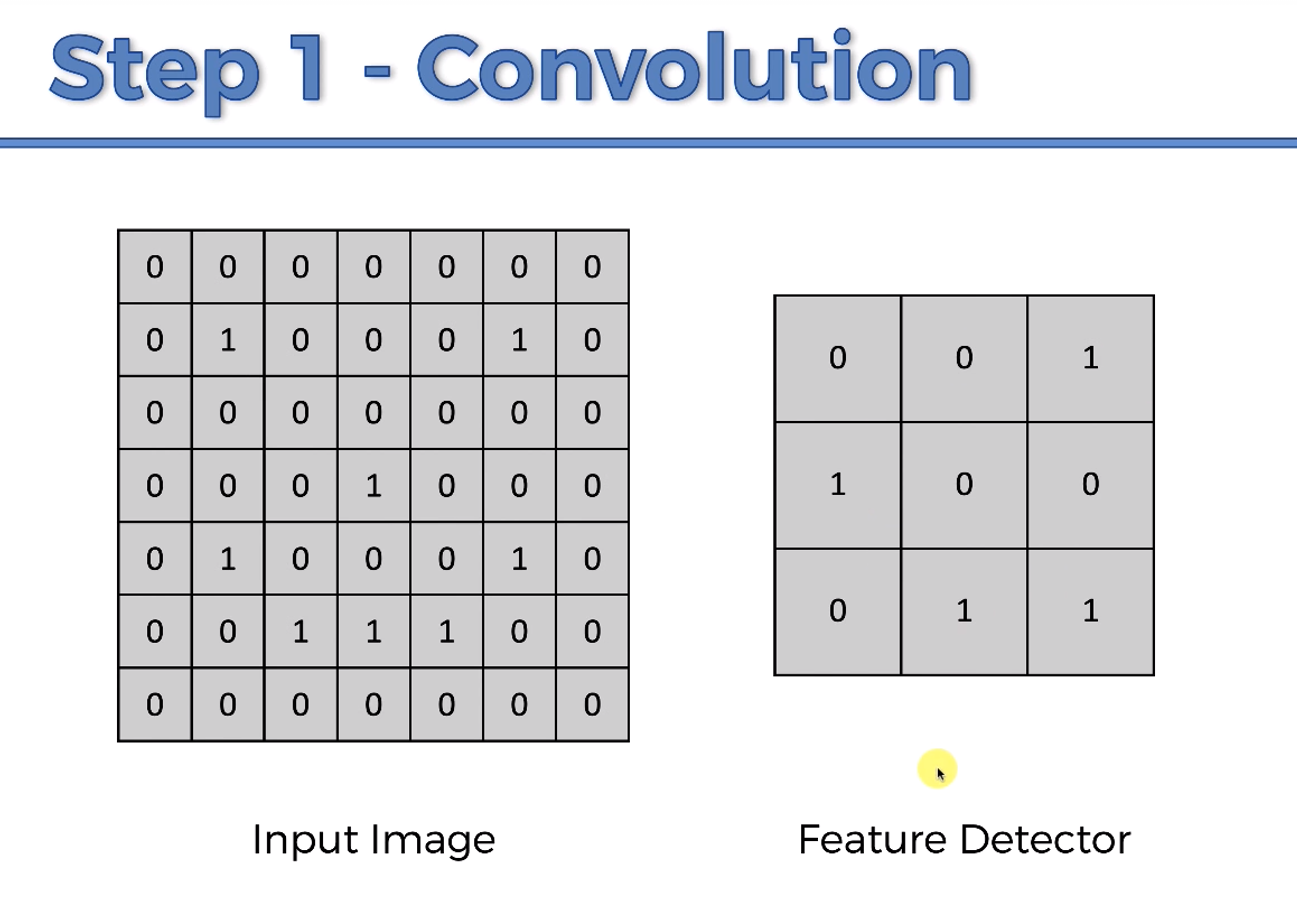

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#Poolsize ist das 2x2 Kästen wo die größte Zahl ausgewählt wird und in die Pooled Feature Map übertragen wird

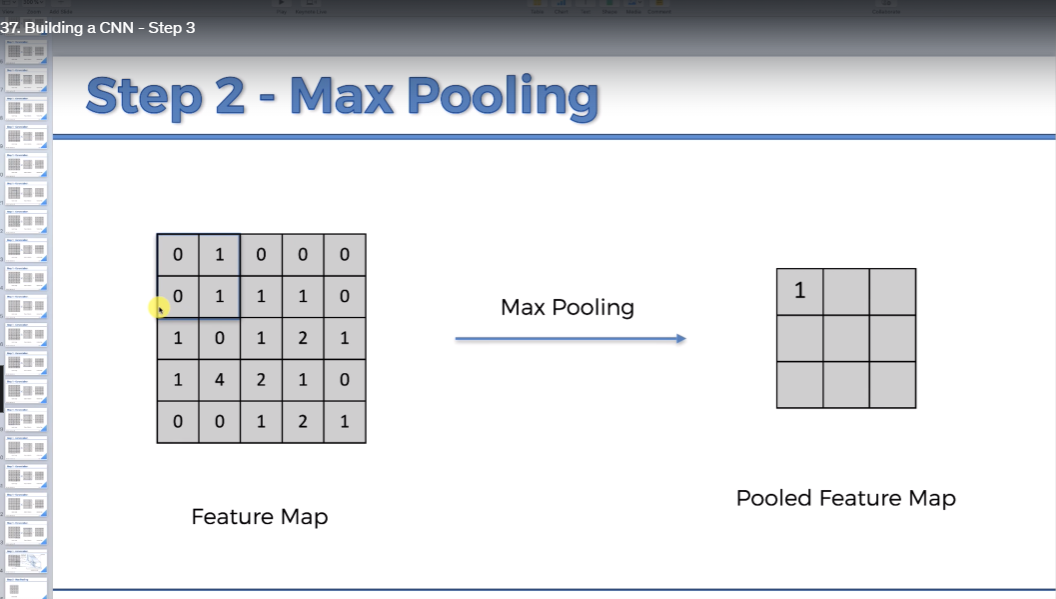

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=34, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accurarcy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

## Part 4 - Making a single prediction

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_predicition/cat_or_dog_1.jpg', target_size = (64, 64))
# damit die predict method das blild aktzeptiert müssen wir das format erst richtig fromatieren:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0) #axis sagt das der batch die dimension 1 hat

result = cnn.predict(test_image/255.0) #jetzt ist alles vorbereitet mit unserem Testbild und jetzt können wir die Vorhersage mit dem KI-Modell treffen
training_set.class_indices # was ist 0 und was ist 1 ? damit bekommt man das heraus wenn man es printet
#weil result auch die batch_dimension 1 hat, also ein eindimensionales array ist, müssen wir in die erste dimension des arrays mit [0]. Die zweite ist einfach die erste Datei, da wir nur eine haben, iste s wieder die erste
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)